In [1]:
import matplotlib.pyplot as plt; 
import numpy as np; 
import csv;
import os; 

In [2]:
ethnicity_list = ["All races", "White", "Black", \
                  "Other (American Indian/AK Nativ",  \
                  "Other unspecified (1978-1991)"]

cancer_types_list = ["Breast", "Prostate", "Lung and Bronchus"]
cancer_types_index_list = ["2", "3", "4"]

analysis_type = ["Count", "Percentage"]

gender_types_list = ["Male and female", "Male", "Female"]

SEER_Stat_files = ["Morbidity"]

count_filename_list = ["v01_PuCo.csv", "v01_PaCo.csv"]
count_filename_type_list = ["Publication", "Patent"]


In [3]:
# Make tables of CDC data for each cancer type, for each data type
def parse_data_CDC(file, cancer_type, gender_type, ethnicity_list, analysis_type):
    
    # Build filename to look in the Data archive
    filename = os.path.join("Data", "SEER_Stat", file + ".csv")
    
    data = []; x = []; 
    # Open CDC files and read in all lines
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close() 
    
    # Parse data into variables
    for i in range(6): x.append(0)
    
    # Build lists for each 
    year = []; all_races = []; white = []; black = []; asian = []; unspecified = []; 
    for i in range(len(data)):
        x = data[i].split(",")    
        if x[0] == cancer_type:
            if x[2] == gender_type:
                
                # Remove parentheses from "Other ...
                check_ethnicity = list(x[3]); 
                if (check_ethnicity[-1] == "e" and check_ethnicity[-2] == "v"):
                    x[3] = "".join(check_ethnicity[1:-1])  
                
                if x[1] != "1969-2015": 
                    x[1] = int(x[1]); x[-1] = int(x[-1])
                    
                    if analysis_type == "Percentage": 
                        if x[3] == "All races": 
                            annual_total = x[4];
                            if annual_total == 0:
                                annual_total = 1;
                    else: annual_total = 1; 
                    
                    x[-1] = x[-1]/annual_total;

                    if x[3] == ethnicity_list[0]: all_races.append(x[-1]); year.append(x[1])
                    if x[3] == ethnicity_list[1]: white.append(x[-1])
                    if x[3] == ethnicity_list[2]: black.append(x[-1])
                    if x[3] == ethnicity_list[3]: asian.append(x[-1])    
                    if x[3] == ethnicity_list[4]: unspecified.append(x[-1])
                    
    # Build table of all percentages
    table = np.array([year, white, black, asian, unspecified])
    table = np.transpose(table)
    title = (cancer_type + " Cancer " + file + " " + analysis_type + " of " + gender_type)
    filename = os.path.join("Tables", title + ".csv")
    
    # Open file to clear contents, then write the table
    open(filename, "w").close()
    with open(filename, "w") as output:
        writer = csv.writer(output, lineterminator='\n')
        writer.writerows(table)
    
    
        
    return(year, white, black, asian, unspecified, title)
    

In [4]:
# Make tables of CDC data for each cancer type, for each data type
def scatter_plot(year, white, black, asian, unspecified, title, plot_number):
    ax = fig.add_subplot(plot_number);
    
    plt.scatter(year,white, label = "Caucasian")
    plt.scatter(year,black, label = "African American")
    plt.scatter(year,asian, label = "Asian and Native American")
    plt.scatter(year,unspecified, label = "Unspecified")
    plt.title(title)
    plt.legend(loc='upper left')
    

Morbidity Breast


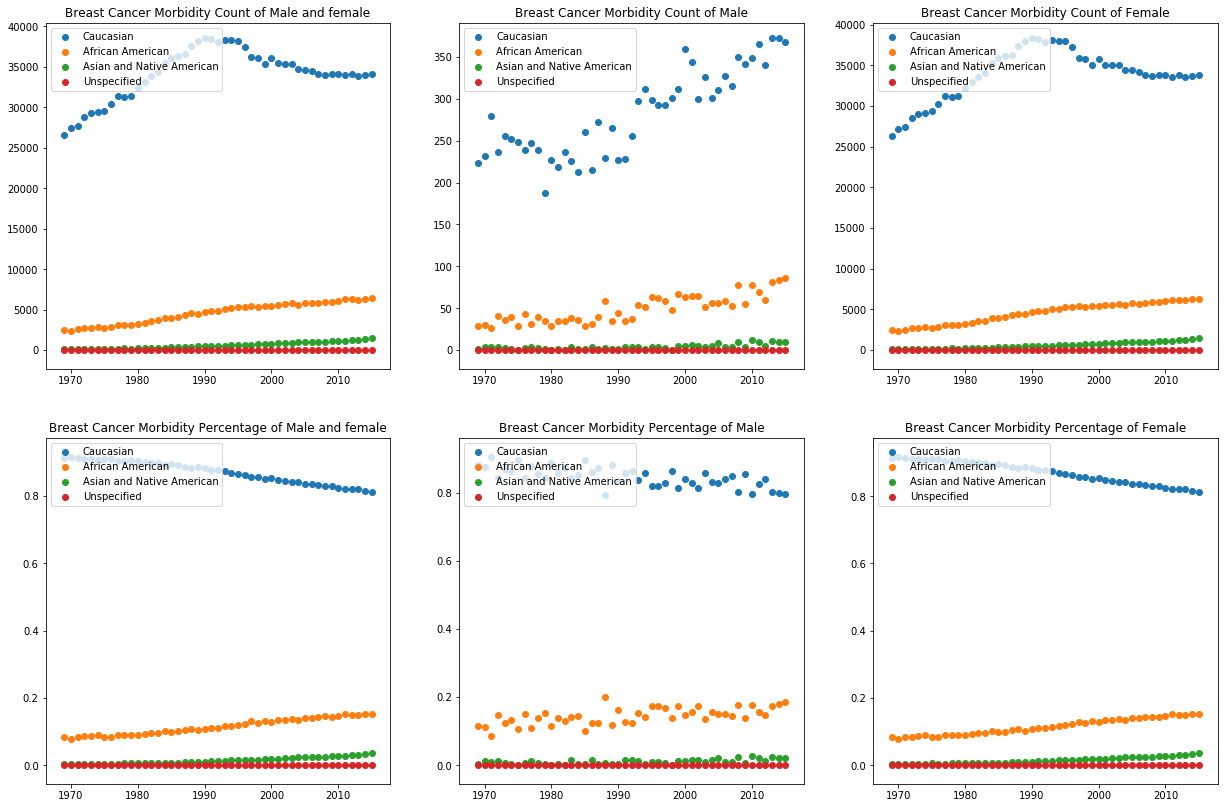

Morbidity Prostate


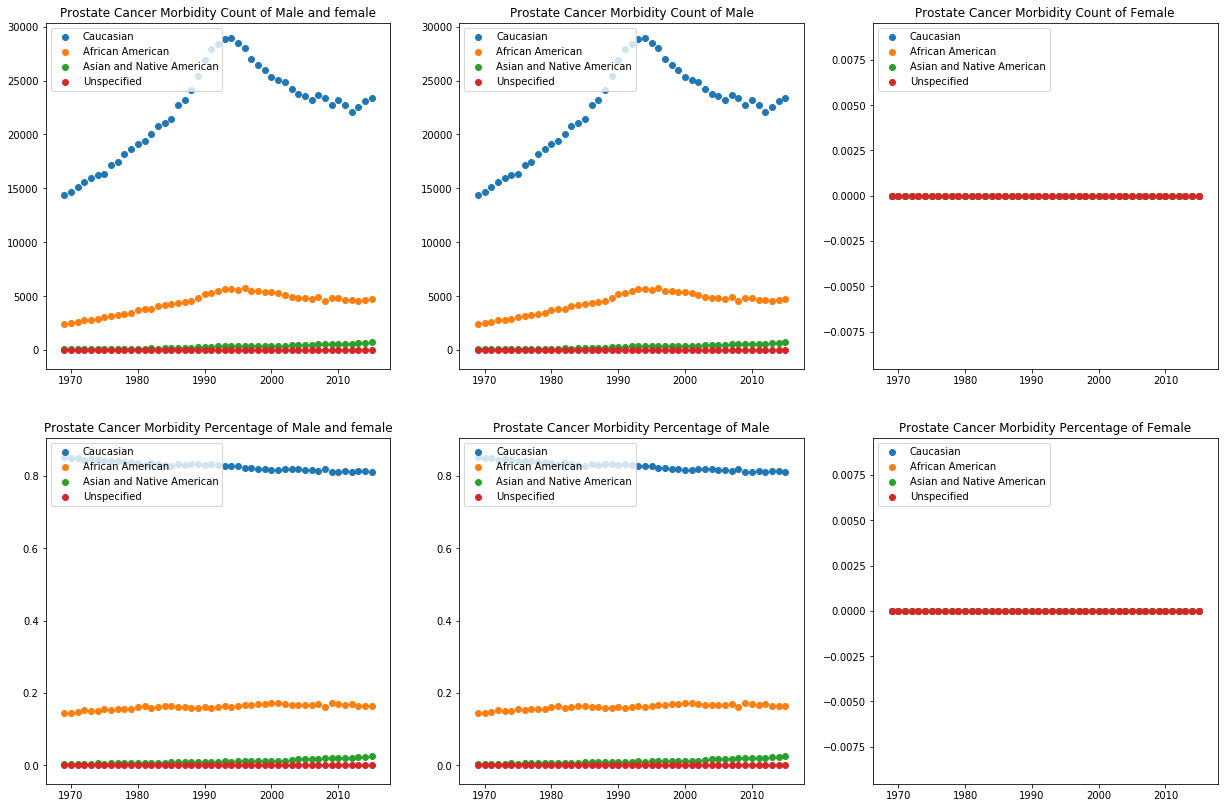

Morbidity Lung and Bronchus


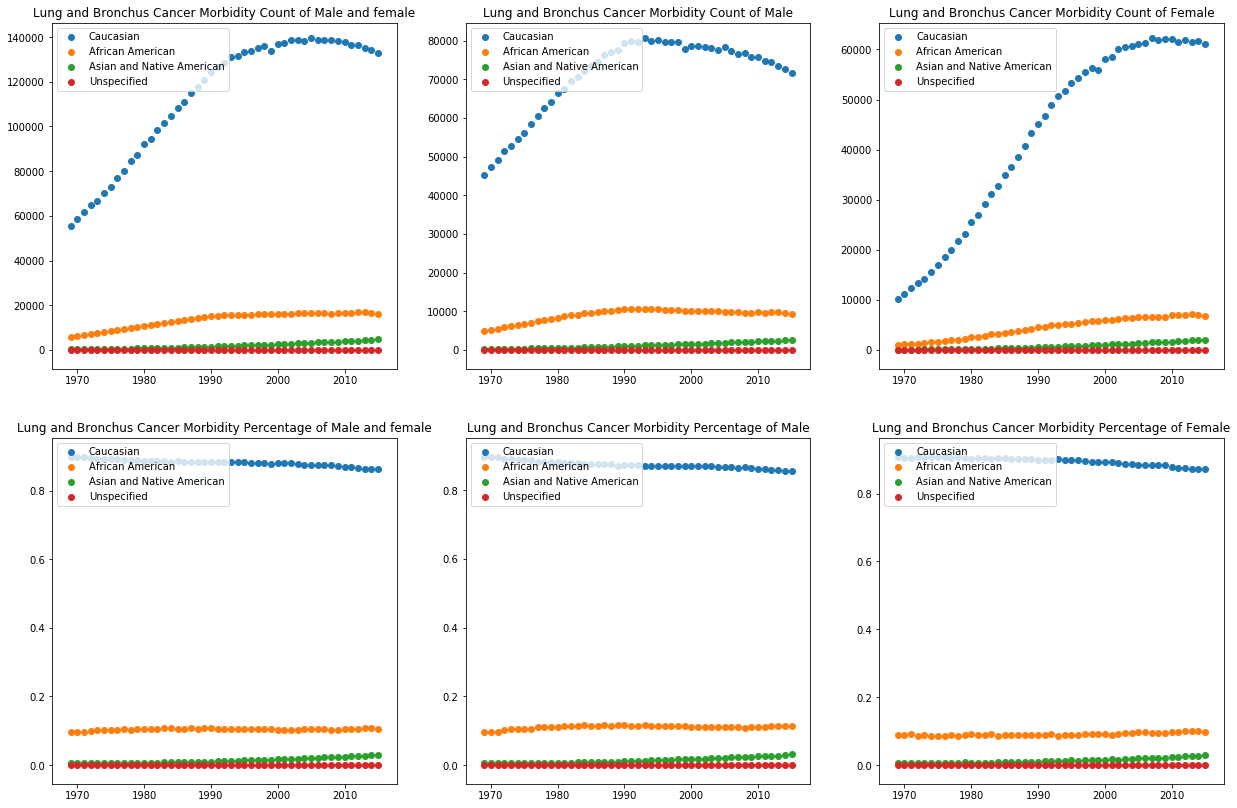

In [5]:

for i in range(len(cancer_types_list)):
    
    box_size = 7; 
    fig = plt.figure(1.5, figsize=(3*box_size, 2*box_size)); 
    plot_number = 230;

    print(SEER_Stat_files[0] + " " + cancer_types_list[i])
    
    for j in range(len(analysis_type)):
        for k in range(len(gender_types_list)):
            
            year, white, black, asian, unspecified, title = \
            parse_data_CDC(SEER_Stat_files[0], cancer_types_list[i], \
            gender_types_list[k], ethnicity_list, analysis_type[j])
            
            plot_number = plot_number+1;
            
            scatter_plot(year, white, black, asian, unspecified, title, plot_number)
    
    saved_filename = os.path.join("Figures", title + '.jpg')
    plt.savefig(saved_filename, bbox_inches='tight') 
    plt.show()



In [6]:
# Parse publication and patent citations by race/ethnicity

def parse_data_count(file, cancer_type):
    
    filename = os.path.join("Data", file)
        
    caucasian = []; african_american = []; asian =[]; hispanic =[]; native_american = []; unknown = [];
    count_caucasian = 0; count_african_american = 0; count_asian = 0; count_hispanic = 0; count_native_american = 0; count_unknown = 0; 
    
    x = []; data = [];
    for i in range(5): x.append(0)
        
    f = open(filename,'r')
    for line in f: data.append(line)
    f.close()   
    
    # Find the min and max year
    year_min = 2030; year_max = 1900; 
    for i in range(len(data)): 
        x = data[i].split(",") 
        if i > 0: 
            x[3] = int(x[3]);
            if year_min > x[3]:
                year_min = x[3];
            if year_max < x[3]:
                year_max = x[3];
    
    # Build a list of all years in dataset
    year_list = []; 
    for i in range(year_max-year_min+1): year_list.append(year_min+i-1); caucasian.append(0); african_american.append(0); asian.append(0); hispanic.append(0); native_american.append(0); unknown.append(0);
    
    # Count articles published each year
    for y in range(len(year_list)): 
        for i in range(len(data)): 
            x = data[i].split(",") 
            if i > 0:  
                if x[2] == cancer_type:     
                    x[3] = int(x[3]); x[4]=int(x[4]);
                    if x[3] == year_list[y]: 
                        if x[1] == "1": asian[y] = asian[y] + x[4];
                        if x[1] == "2": african_american[y] = african_american[y] + x[4];
                        if x[1] == "3": hispanic[y] = hispanic[y] + x[4];
                        if x[1] == "4": native_american[y] = native_american[y] + x[4];
                        if x[1] == "5": caucasian[y] = caucasian[y] + x[4];
                        if x[1] == "6": unknown[y] = unknown[y] + x[4];
            
    return(year_list, caucasian, african_american, asian, hispanic, native_american)


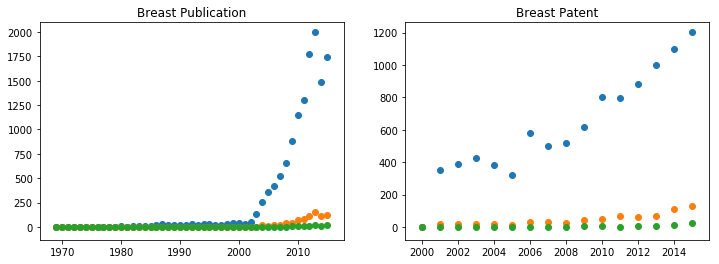

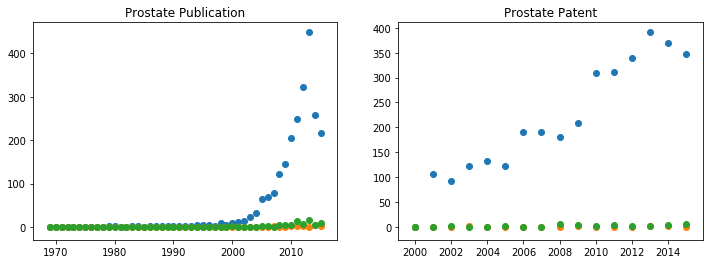

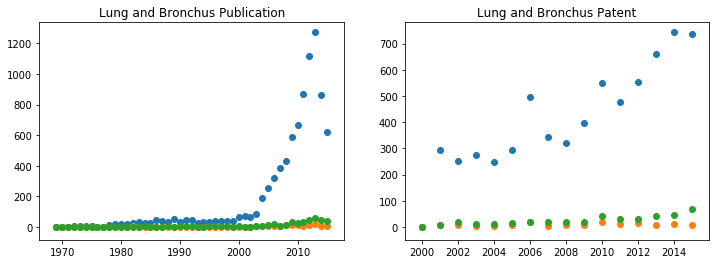

In [7]:

for c in range(len(cancer_types_index_list)):
    
    box_size = 4; 
    fig = plt.figure(1.5, figsize=(3*box_size, 1*box_size)); 
    plot_number = 120;

    for i in range(len(count_filename_list)):
        year_list, caucasian, african_american, asian, hispanic, native_american =  \
        parse_data_count(count_filename_list[i], cancer_types_index_list[c])
    
        plot_number = plot_number+1
        ax = fig.add_subplot(plot_number);
        plt.scatter(year_list, caucasian)
        plt.scatter(year_list, african_american)
        plt.scatter(year_list, asian)
        plt.title(cancer_types_list[c] + " " + count_filename_type_list[i])
        
    plt.show()
    

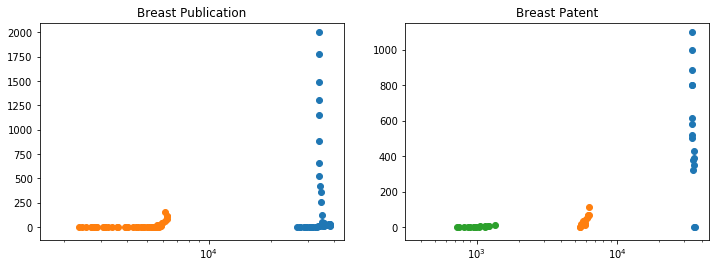

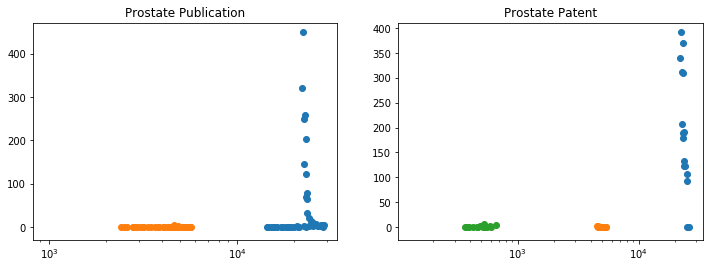

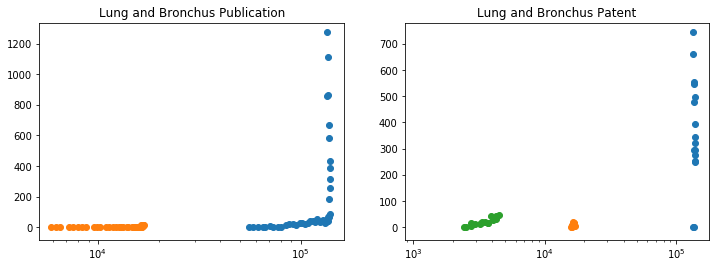

In [8]:


for c in range(len(cancer_types_index_list)):

    box_size = 4; 
    fig = plt.figure(1.5, figsize=(3*box_size, 1*box_size)); 
    plot_number = 120;

    for f in range(len(count_filename_list)):

        year_list, caucasian, african_american, asian_count, hispanic, native_american =  \
        parse_data_count(count_filename_list[f], cancer_types_index_list[c])
        
        year, white, black, asian, unspecified, title = \
        parse_data_CDC(SEER_Stat_files[0], cancer_types_list[c], \
        gender_types_list[0], ethnicity_list, analysis_type[0])

        year_min = min(year_list)
        if year_min < min(year): year_min = min(year)

        year_max = max(year_list)
        if year_max > max(year): year_max = max(year)

        years = []; white_p=[]; white_m=[]; black_p=[]; black_m=[]; asian_p=[]; asian_m=[];
        for i in range(year_max-year_min+1):
            years.append(year_min+i-1)
            white_p.append(0); white_m.append(0);
            black_p.append(0); black_m.append(0);
            asian_p.append(0); asian_m.append(0);

        for i in range(len(years)): 
            for j in range(len(year_list)):
                if years[i] == year_list[j]:
                    white_p[i] = caucasian[j]; black_p[i] = african_american[j]; 
                    asian_p[i] = asian_count[j];
    
            for j in range(len(year)):
                if years[i] == year[j]:
                    white_m[i] = white[j]; black_m[i] = black[j]; asian_m[i] = asian[j];
    
        plot_number = plot_number+1;
        ax = fig.add_subplot(plot_number);
    
        plt.scatter(white_m, white_p)
        plt.scatter(black_m, black_p)
        plt.scatter(asian_m, asian_p)
        ax.set_xscale('log')
        plt.title(cancer_types_list[c] + " " + count_filename_type_list[f])
    
    plt.show()
